# ***PROJET 4: Réalisez une étude de santé publique avec R ou Python***

##### 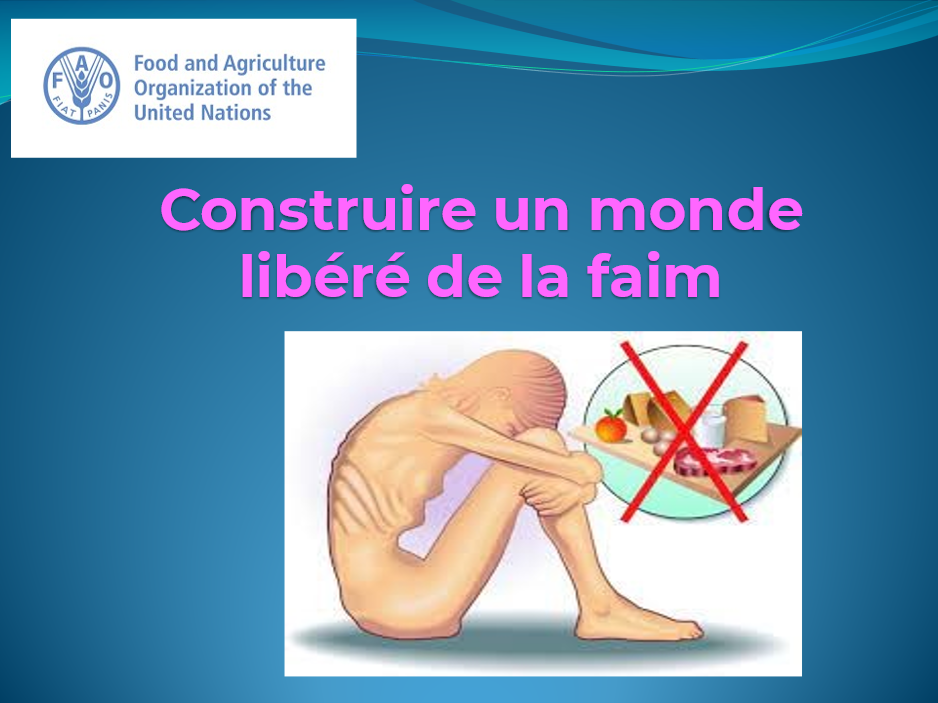

 le but de ce projet est de présenter les indicateurs de la faim et de la malnutrition dans le monde. Ce notebook Jupyter présente les codes écrits en python qui ont permis de calculer l’ensemble des résultats/indicateurs demandés

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas

# **Indicateurs de sous-nutrition** 

In [2]:
# importation du fichier de données
df_nutrition = pd.read_csv('sous_nutrition.csv', sep =',')
df_nutrition

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


### *Exploration, constitution du fichier d'analyse et traitement des valeurs manquantes*

In [3]:
df_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [4]:
df_nutrition.describe()

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Tchéquie,2014-2016,<0.1
freq,6,203,120


In [5]:
df_nutrition.isnull().sum()

Zone        0
Année       0
Valeur    594
dtype: int64

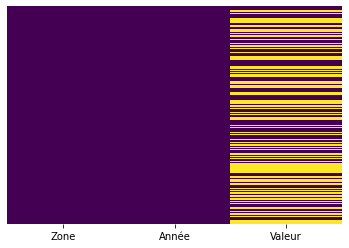

In [6]:
#Visualisation des valeurs manquantes
sns.heatmap(df_nutrition.isnull(), yticklabels=False, cbar=False, cmap='viridis')

***Recodage des années***

In [6]:
df_nutrition.Année.unique()

array(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018',
       '2017-2019'], dtype=object)

In [7]:
#recodage des plages d'années
df_nutrition.loc[df_nutrition['Année']== '2012-2014', 'Année'] = 2013
df_nutrition.loc[df_nutrition['Année']== '2013-2015', 'Année'] = 2014
df_nutrition.loc[df_nutrition['Année']== '2014-2016', 'Année'] = 2015
df_nutrition.loc[df_nutrition['Année']== '2015-2017', 'Année'] = 2016
df_nutrition.loc[df_nutrition['Année']== '2016-2018', 'Année'] = 2017
df_nutrition.loc[df_nutrition['Année']== '2017-2019', 'Année'] = 2018
df_nutrition.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


***conversion des colonnes en valeur numeriques***

In [8]:
#convertir la colonne valeur en numerique
df_nutrition["Valeur"] = pd.to_numeric(df_nutrition["Valeur"], errors='coerce')
df_nutrition.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

In [9]:
#convertir la colonne Année en numerique
df_nutrition["Année"] = pd.to_numeric(df_nutrition["Année"], errors='coerce')
df_nutrition.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [10]:
#Fichier brut 2017
df2017 = df_nutrition[df_nutrition.Année == 2017]
df2017.head(5)

,Zone,Année,Valeur
4,Afghanistan,2017,10.5
10,Afrique du Sud,2017,3.1
16,Albanie,2017,0.1
22,Algérie,2017,1.3
28,Allemagne,2017,NaN


***Importation des données de population pour calculer les taux***

In [11]:
population = pd.read_csv('population.csv', sep =",")
pop2017 = pd.DataFrame(population[population.Année == 2017])
#renommer les colonnes
pop2017.rename(columns = {'Valeur':'Population'}, inplace=True)
pop2017.head(5)

,Zone,Année,Population
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


In [12]:
#supprimer l'année dans notre dataframe

pop2017.drop(columns= ['Année'], inplace=True, axis=1)
pop2017.head(5)

,Zone,Population
4,Afghanistan,36296.113
10,Afrique du Sud,57009.756
16,Albanie,2884.169
22,Algérie,41389.189
28,Allemagne,82658.409


***Creation du fichier de travail***

In [13]:
#jointure entre les fichiers de population et de sous-nutrition
df = pd.merge(df2017, pop2017)
df

,Zone,Année,Valeur,Population
0,Afghanistan,2017,10.5,36296.113
1,Afrique du Sud,2017,3.1,57009.756
2,Albanie,2017,0.1,2884.169
3,Algérie,2017,1.3,41389.189
4,Allemagne,2017,NaN,82658.409
...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8.0,29402.484
199,Viet Nam,2017,6.5,94600.648
200,Yémen,2017,NaN,27834.819
201,Zambie,2017,NaN,16853.599


In [14]:
# Convertir les unités
df['Population'] = df['Population'] * 1000
df['Valeur'] = df['Valeur'] * 1000000
df

,Zone,Année,Valeur,Population
0,Afghanistan,2017,10500000.0,36296113.0
1,Afrique du Sud,2017,3100000.0,57009756.0
2,Albanie,2017,100000.0,2884169.0
3,Algérie,2017,1300000.0,41389189.0
4,Allemagne,2017,NaN,82658409.0
...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8000000.0,29402484.0
199,Viet Nam,2017,6500000.0,94600648.0
200,Yémen,2017,NaN,27834819.0
201,Zambie,2017,NaN,16853599.0


***Traitement des valeurs manquantes***

In [15]:

df.isnull().sum()

Zone            0
Année           0
Valeur        119
Population      0
dtype: int64

In [16]:
# Traitement des valeurs manquantes: on les remplace par zéro
df.fillna(0, inplace=True)
df

,Zone,Année,Valeur,Population
0,Afghanistan,2017,10500000.0,36296113.0
1,Afrique du Sud,2017,3100000.0,57009756.0
2,Albanie,2017,100000.0,2884169.0
3,Algérie,2017,1300000.0,41389189.0
4,Allemagne,2017,0.0,82658409.0
...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8000000.0,29402484.0
199,Viet Nam,2017,6500000.0,94600648.0
200,Yémen,2017,0.0,27834819.0
201,Zambie,2017,0.0,16853599.0


Proportion des personnes en état de sous nutrition

In [17]:
proportion = (df['Valeur'].sum()/df['Population'].sum())*100
proportion

7.1011968332354165

In [18]:
#Nombre de personnes en état de sous-nutrition
print(df['Valeur'].sum())

535700000.0


In [19]:
print(df['Population'].sum())

7543798779.0


### ***La proportion de personnes en état de sous-nutrition en 2017 est  de 7.10%***

In [20]:
# Calcul de la colonne de taux de sous nutrition
df['taux_sous_nutrition']= round((df.Valeur/df.Population)*100, 2)
df

,Zone,Année,Valeur,Population,taux_sous_nutrition
0,Afghanistan,2017,10500000.0,36296113.0,28.93
1,Afrique du Sud,2017,3100000.0,57009756.0,5.44
2,Albanie,2017,100000.0,2884169.0,3.47
3,Algérie,2017,1300000.0,41389189.0,3.14
4,Allemagne,2017,0.0,82658409.0,0.00
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,8000000.0,29402484.0,27.21
199,Viet Nam,2017,6500000.0,94600648.0,6.87
200,Yémen,2017,0.0,27834819.0,0.00
201,Zambie,2017,0.0,16853599.0,0.00


### *** les 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017*** 

In [21]:
# 10 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte 

sousalimentationparpays = df.sort_values(by = 'taux_sous_nutrition', ascending = False)
sous_nut= sousalimentationparpays.head(10)
sous_nut.drop(columns= ['Année', 'Valeur','Population'], inplace=True, axis=1)
sous_nut



C:\Program Files\anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Zone,taux_sous_nutrition
78,Haïti,48.26
157,République populaire démocratique de Corée,47.19
108,Madagascar,41.06
103,Libéria,38.28
100,Lesotho,38.25
183,Tchad,37.96
161,Rwanda,35.06
121,Mozambique,32.81
186,Timor-Leste,32.17
0,Afghanistan,28.93


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

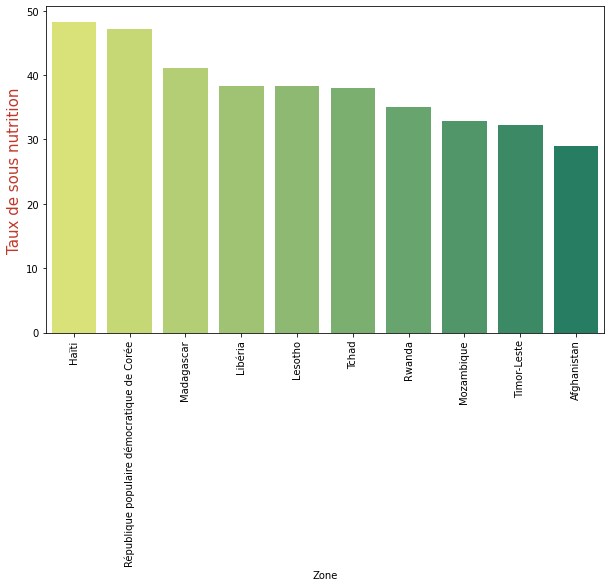

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=sous_nut['Zone'], y=sous_nut['taux_sous_nutrition'], palette='summer_r')

plt.ylabel("Taux de sous nutrition", fontsize=15, color='#c0392b')

plt.xticks(rotation= 90)


# **Indicateurs d'aide alimentaire** 

In [23]:
aide = pd.read_csv('aide_alimentaire.csv', sep =',')
aide

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


**Exploration de la base de données**

In [24]:
aide.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [25]:
#Statistiques descriptives
aide.describe(include='all')

,Pays bénéficiaire,Année,Produit,Valeur
count,1475,1475.000000,1475,1475.000000
unique,76,NaN,16,NaN
top,Algérie,NaN,Non-céréales,NaN
freq,39,NaN,220,NaN
mean,NaN,2014.054237,NaN,7481.966780
std,NaN,0.946916,NaN,23339.531424
min,NaN,2013.000000,NaN,0.000000
25%,NaN,2013.000000,NaN,287.500000
50%,NaN,2014.000000,NaN,1178.000000
75%,NaN,2015.000000,NaN,4334.500000


In [26]:
aide.isnull().sum()

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

**Création du fichier de travail**

Les indicateurs concernent les années 2013 à 2017, nous allons créer les fichiers pour toutes ces années , ensuite nous allons créer la colonne du montant de l'aide qui est la somme des différents produits et calculer pour chaque année les pays qui ont le plus reçu de l'aide

## **Aide 2013**

In [27]:
#fichier de 2013
sub_2013 = aide[aide.Année == 2013]
sub_2013.head(5)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
2,Afghanistan,2013,Blé et Farin,39224
4,Afghanistan,2013,Céréales,40504
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087


In [28]:
# Fichier d'aide par type de produits et par pays
aid2013 = sub_2013.pivot_table('Valeur', index='Pays bénéficiaire', columns='Produit', fill_value=0)
aid2013

Produit,Autres non-céréales,Blé et Farin,BulgurFarEnt,Céréales,Céréales Secondaires,"Fruits secs, total",Graisses Com,Huiles végétales,"Lait, total","Légumineuses Sèches,Tot.",Mélanges et préparations,Non-céréales,Poiss&produi,"Riz, total","Sucre, total",Viande Total
Pays bénéficiaire,,,,,,,,,,,,,,,,
Afghanistan,682,39224,0,40504,0,85,0,11087,0,11761,0,23615,0,1280,0,0
Algérie,252,0,0,10030,2862,204,0,1030,350,4111,3112,7587,0,4056,1640,0
Angola,0,0,0,2500,0,0,0,0,0,0,2500,0,0,0,0,0
Bangladesh,0,56709,0,59954,0,515,0,2335,0,2044,2004,5555,580,1241,81,0
Bhoutan,0,0,0,537,0,0,0,127,0,198,0,325,0,537,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zambie,0,0,0,0,0,0,0,164,0,0,0,164,0,0,0,0
Zimbabwe,1,0,0,5604,5330,0,0,871,0,4150,210,5022,0,64,0,0
Égypte,0,0,0,0,0,561,0,0,0,0,0,561,0,0,0,0


In [29]:
#création de la colonne aide alimentaire
aid2013['aide'] =aid2013.iloc[:,0:16].sum(axis=1)
aid2013.head(5)

Produit,Autres non-céréales,Blé et Farin,BulgurFarEnt,Céréales,Céréales Secondaires,"Fruits secs, total",Graisses Com,Huiles végétales,"Lait, total","Légumineuses Sèches,Tot.",Mélanges et préparations,Non-céréales,Poiss&produi,"Riz, total","Sucre, total",Viande Total,aide
Pays bénéficiaire,,,,,,,,,,,,,,,,,
Afghanistan,682,39224,0,40504,0,85,0,11087,0,11761,0,23615,0,1280,0,0,128238
Algérie,252,0,0,10030,2862,204,0,1030,350,4111,3112,7587,0,4056,1640,0,35234
Angola,0,0,0,2500,0,0,0,0,0,0,2500,0,0,0,0,0,5000
Bangladesh,0,56709,0,59954,0,515,0,2335,0,2044,2004,5555,580,1241,81,0,131018
Bhoutan,0,0,0,537,0,0,0,127,0,198,0,325,0,537,0,0,1724


### ***les 10 pays qui ont le plus bénéficié d'aide en 2013***: 

In [30]:
# les 10 Pays qui ont le plus beneficié de l'aide alimentaire en 2013
df= aid2013.sort_values(by = 'aide', ascending = False)
df= df.drop(df.iloc[:,0:16], axis=1) 

df2013= df.head(10)
df2013

Produit,aide
Pays bénéficiaire,
Éthiopie,591404
République arabe syrienne,563566
Soudan,330230
Yémen,264764
Kenya,220966
Soudan du Sud,196330
République démocratique du Congo,150320
Somalie,139800
Bangladesh,131018


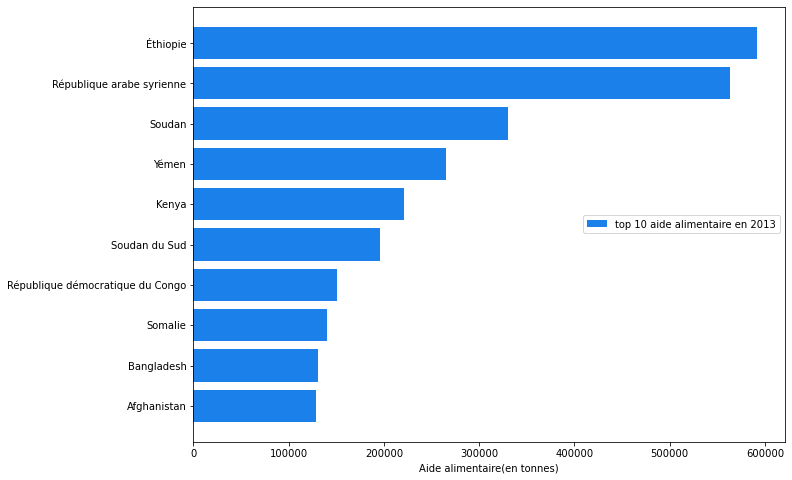

In [31]:
fig, axe = plt.subplots(figsize=(10.6,8))

y = df2013['aide']
x = df2013.index  
axe.barh(x, y, label='top 10 aide alimentaire en 2013', color='#1B80EA')
axe.legend(loc='center right')
axe.set_xlabel('Aide alimentaire(en tonnes)')

plt.gca().invert_yaxis()


## ***Aide 2014***

In [32]:
# Fichier 2014
aide2014= aide[aide.Année == 2014]
df_2014 = aide2014.pivot_table('Valeur', index='Pays bénéficiaire', columns='Produit', fill_value=0)
df_2014['aide'] =df_2014.iloc[:,0:16].sum(axis=1)
df_2014

Produit,Autres non-céréales,Blé et Farin,BulgurFarEnt,Céréales,Céréales Secondaires,"Fruits secs, total",Huiles végétales,"Lait, total","Légumineuses Sèches,Tot.",Mélanges et préparations,Non-céréales,Poiss&produi,"Riz, total","Sucre, total",Viande Total,aide
Pays bénéficiaire,,,,,,,,,,,,,,,,
Afghanistan,335,15160,0,15989,0,0,8185,0,4010,0,12618,0,829,88,0,57214
Algérie,205,0,0,4933,2280,0,1050,582,2240,1731,4557,0,922,480,0,18980
Angola,7,0,0,0,0,0,0,0,0,0,7,0,0,0,0,14
Bangladesh,0,91350,0,94706,0,0,1371,0,1194,1528,2608,0,1828,43,0,194628
Bhoutan,0,0,0,0,0,0,73,0,0,0,73,0,0,0,0,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tchad,773,0,0,42874,40844,0,1915,0,3141,2030,6089,0,0,260,0,97926
Yémen,211,22680,0,26949,0,0,8203,0,16476,3169,24971,0,1100,81,0,103840
Zambie,0,0,0,1349,1349,0,0,0,0,0,0,0,0,0,0,2698


### ***Les 10 pays qui ont le plus bénéficié d'aide en 2014***

In [33]:
d2014= df_2014.sort_values(by = 'aide', ascending = False)
df1= d2014.drop(df_2014.iloc[:,0:15], axis=1)
df2014= df1.head(10)
df2014

Produit,aide
Pays bénéficiaire,
République arabe syrienne,651870
Éthiopie,586624
Soudan du Sud,450610
Soudan,321904
Kenya,217418
Bangladesh,194628
Pakistan,110268
Philippines,105424
Yémen,103840


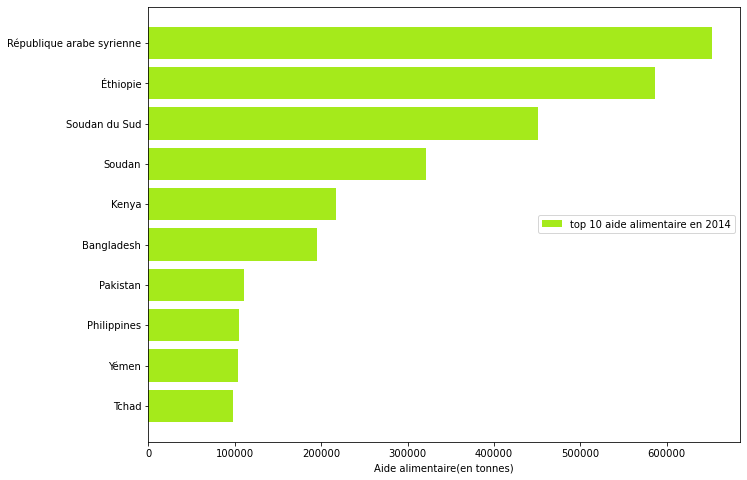

In [34]:
fig, axe = plt.subplots(figsize=(10.6,8))

y = df2014['aide']
x = df2014.index  
axe.barh(x, y, label='top 10 aide alimentaire en 2014', color='#a5ea1b') #color=list('rgbkym'))
axe.legend(loc='center right')
axe.set_xlabel('Aide alimentaire(en tonnes)')

plt.gca().invert_yaxis()

## ***Aide 2015***

In [35]:
# Fichier 2015
aide2015= aide[aide.Année == 2015]
aide2015

,Pays bénéficiaire,Année,Produit,Valeur
18,Algérie,2015,Autres non-céréales,4
21,Algérie,2015,Céréales,3512
25,Algérie,2015,Céréales Secondaires,1311
28,Algérie,2015,"Fruits secs, total",252
34,Algérie,2015,"Lait, total",500
...,...,...,...,...
1459,Zimbabwe,2015,Céréales,7053
1462,Zimbabwe,2015,Céréales Secondaires,6957
1465,Zimbabwe,2015,Huiles végétales,306
1470,Zimbabwe,2015,Mélanges et préparations,96


In [36]:
df2015 = aide2015.pivot_table('Valeur', index='Pays bénéficiaire', columns='Produit', fill_value=0)
df2015['aide'] =df2015.iloc[:,0:16].sum(axis=1)
df2015.head(5)

Produit,Autres non-céréales,Blé et Farin,BulgurFarEnt,Céréales,Céréales Secondaires,"Fruits secs, total",Huiles végétales,"Lait, total","Légumineuses Sèches,Tot.",Mélanges et préparations,Non-céréales,Poiss&produi,"Riz, total","Sucre, total",aide
Pays bénéficiaire,,,,,,,,,,,,,,,
Algérie,4,0,0,3512,1311,252,0,500,3026,559,5200,0,1642,1418,17424
Bangladesh,0,9740,0,10609,0,486,111,0,65,869,662,0,0,0,22542
Bhoutan,0,0,0,0,0,0,91,0,198,0,289,0,0,0,578
Burkina Faso,27,0,0,9066,158,126,590,0,1782,3538,2525,0,5370,0,23182
Burundi,110,0,0,5648,745,0,390,0,270,4903,820,0,0,50,12936


### ***Les 10 pays qui ont le plus bénéficié d'aide en 2015***

In [37]:
# les 10 Pays qui ont le plus beneficié de l'aide alimentaire en 2015
df= df2015.sort_values(by = 'aide', ascending = False)
df2= df.drop(df.iloc[:,0:14], axis=1) 
d2015= df2.head(10)
d2015

Produit,aide
Pays bénéficiaire,
République arabe syrienne,524949
Yémen,372306
Éthiopie,203266
Kenya,114452
Tchad,73678
Somalie,71698
République populaire démocratique de Corée,70506
République démocratique du Congo,68048
Niger,54656


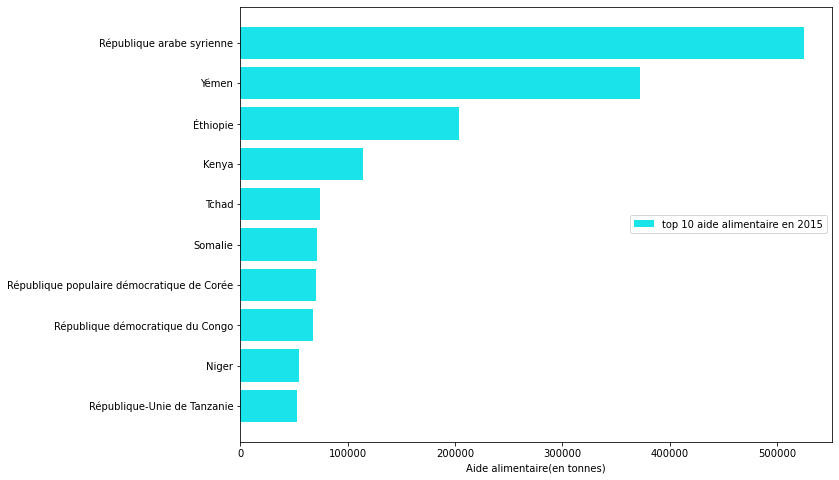

In [38]:
fig, axe = plt.subplots(figsize=(10.6,8))

y = d2015['aide']
x = d2015.index  
axe.barh(x, y, label='top 10 aide alimentaire en 2015', color='#1be3ea') #color=list('rgbkym'))
axe.legend(loc='center right')
axe.set_xlabel('Aide alimentaire(en tonnes)')

plt.gca().invert_yaxis()


## ***Aide 2016***

In [39]:
#fichier de 2016
aide2016 = aide[aide.Année == 2016]
df2016 = aide2016.pivot_table('Valeur', index='Pays bénéficiaire', columns='Produit', fill_value=0)
df2016['Aide_alimentaire'] =df2016.iloc[:,0:16].sum(axis=1)
df2016

Produit,Autres non-céréales,Blé et Farin,BulgurFarEnt,Céréales,Céréales Secondaires,"Fruits secs, total",Huiles végétales,"Lait, total","Légumineuses Sèches,Tot.",Mélanges et préparations,Non-céréales,Poiss&produi,"Riz, total","Sucre, total",Aide_alimentaire
Pays bénéficiaire,,,,,,,,,,,,,,,
Algérie,0,0,0,3766,1178,252,0,0,360,855,972,0,1733,360,9476
Bhoutan,0,0,0,0,0,0,109,0,0,0,109,0,0,0,218
Burkina Faso,0,0,0,0,0,36,0,0,0,0,36,0,0,0,72
Bénin,0,0,0,0,0,72,0,0,0,0,72,0,0,0,144
Cameroun,0,0,0,0,0,0,289,0,0,0,289,0,0,0,578
Colombie,0,0,0,1963,0,0,0,0,770,0,770,0,1963,0,5466
Côte d'Ivoire,0,0,0,4323,0,0,70,0,0,0,70,0,4323,0,8786
El Salvador,0,0,0,596,0,0,0,0,0,0,0,0,596,0,1192
Gambie,0,0,0,0,0,0,0,0,168,0,168,0,0,0,336


### ***Les 10 pays qui ont le plus bénéficié d'aide en 2016***

In [40]:
# les 10 Pays qui ont le plus beneficié de l'aide alimentaire en 2016
dff= df2016.sort_values(by = 'Aide_alimentaire', ascending = False)
df3= dff.drop(df.iloc[:,0:14], axis=1) 
d2016= df3.head(10)
d2016

Produit,Aide_alimentaire
Pays bénéficiaire,
Yémen,465574
République arabe syrienne,118558
Niger,92742
Haïti,12462
Algérie,9476
Côte d'Ivoire,8786
Colombie,5466
Honduras,4492
Libye,4414


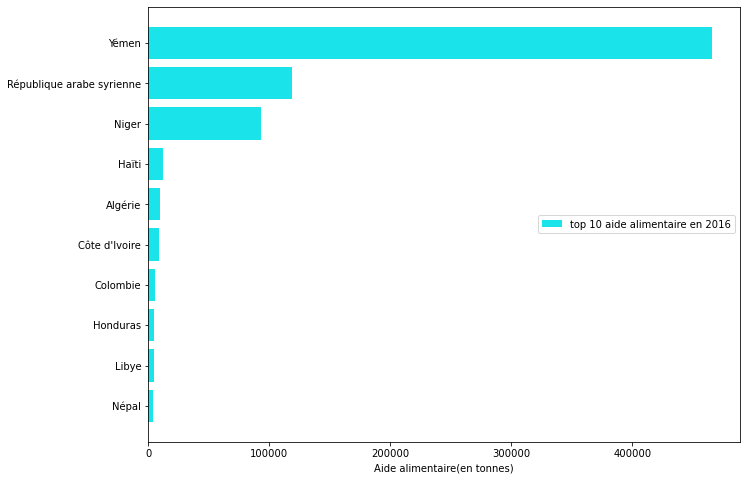

In [41]:
fig, axe = plt.subplots(figsize=(10.6,8))

y = d2016['Aide_alimentaire']
x = d2016.index  
axe.barh(x, y, label='top 10 aide alimentaire en 2016', color='#1be3ea') #color=list('rgbkym'))
axe.legend(loc='center right')
axe.set_xlabel('Aide alimentaire(en tonnes)')

plt.gca().invert_yaxis()

### ***Aide 2017: les données sont indisponibles***

# **Indicateurs de disponibilité alimentaire** 

In [42]:
# dataframe dispo alimentaire
disponibilite = pd.read_csv('dispo_alimentaire.csv', sep =",")
disponibilite

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


***Exploration de la base de données***

In [43]:
disponibilite.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [44]:
disponibilite.isnull().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

## ***Nombre théorique de personnes pouvant être nourries***

On va utiliser la disponibilité en kcal par personne et par jour

In [45]:
#fichier de travail sur la disponibilité

dispo2 = pd.DataFrame(disponibilite, columns=['Zone', 'Produit', 'Origine', 'Aliments pour animaux', 'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)'])
dispo2.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)': 'disponibilité'}, inplace=True)
dispo2

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,disponibilité
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0
...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0


In [46]:
#fichier de travail sur la population en 2013
population = pd.read_csv('population.csv', sep =",")

pop2013 = pd.DataFrame(population[population.Année == 2013])
pop2013.drop(columns= ['Année'], inplace=True, axis=1)
pop2013.rename(columns = {'Valeur':'population'}, inplace=True)
pop2013

,Zone,population
0,Afghanistan,32269.589
6,Afrique du Sud,53687.121
12,Albanie,2903.790
18,Algérie,38140.133
24,Allemagne,81174.367
...,...,...
1386,Venezuela (République bolivarienne du),29781.040
1392,Viet Nam,90752.592
1398,Yémen,25147.109
1404,Zambie,14926.544


***Création du fichier de travail***

In [47]:
#jointure entre les fichiers de disponibilité et de population à partie de la clé "zone"
df = pd.merge(dispo2, pop2013)
df.head(10)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,disponibilité,population
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,32269.589
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,32269.589
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,32269.589
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,32269.589
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,32269.589
5,Afghanistan,"Beurre, Ghee",animale,NaN,NaN,23.0,32269.589
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,32269.589
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,32269.589
8,Afghanistan,Boissons Alcooliques,vegetale,NaN,NaN,0.0,32269.589
9,Afghanistan,Café,vegetale,NaN,NaN,0.0,32269.589


***Traitement des données manquantes***

In [48]:
#traitement des données manquantes
df.fillna(0, inplace=True)
df['population'] = df['population'] * 1000
df

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,disponibilité,population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,32269589.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,32269589.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,32269589.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,32269589.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,32269589.0
...,...,...,...,...,...,...,...
15411,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,571336.0
15412,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,571336.0
15413,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,571336.0
15414,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,571336.0


***La disponibilité par pays et par produit***
est égale à la disponibilité du produit  multiplié par le nombre d'habitant

In [49]:
#Calcul de la disponibilité totale par pays
df['dipo_totale'] = df['disponibilité']*df['population']
df

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,disponibilité,population,dipo_totale
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,32269589.0,161347945.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,32269589.0,32269589.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,32269589.0,32269589.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,32269589.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,32269589.0,129078356.0
...,...,...,...,...,...,...,...,...
15411,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,571336.0,25710120.0
15412,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,571336.0,6284696.0
15413,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,571336.0,0.0
15414,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,571336.0,0.0


### ***Nombre théorique de personnes pouvant être nourries est de 10 022 181 563 milliard de personnes***

In [50]:
#calcul du nombre théorique de personnes pouvant être nourries
# on suppose que le nombre moyen de calories nécessaire à un être humain est de 2000
import locale
locale.setlocale(locale.LC_ALL, '')
Nombretheorique = (df['dipo_totale'].sum())/2000
print('le nombre théorique de personne pouvant être nourries est de:', locale.format('%d', round(Nombretheorique,2), 1), 'milliard de personnes')


le nombre théorique de personne pouvant être nourries est de: 10 022 181 563 milliard de personnes


<ipython-input-50-84454492daec>:6: DeprecationWarning: This method will be removed in a future version of Python. Use 'locale.format_string()' instead.
  print('le nombre théorique de personne pouvant être nourries est de:', locale.format('%d', round(Nombretheorique,2), 1), 'milliard de personnes')


## ***Pays ayant le plus de disponibilité/habitant***

In [51]:
#fichier de travail
df_disp = df.drop(columns = ['Produit', 'Aliments pour animaux', 'Autres Utilisations', 'population', 'dipo_totale'], axis=1)
df_disp

,Zone,Origine,disponibilité
0,Afghanistan,animale,5.0
1,Afghanistan,vegetale,1.0
2,Afghanistan,vegetale,1.0
3,Afghanistan,vegetale,0.0
4,Afghanistan,vegetale,4.0
...,...,...,...
15411,Îles Salomon,animale,45.0
15412,Îles Salomon,animale,11.0
15413,Îles Salomon,animale,0.0
15414,Îles Salomon,vegetale,0.0


In [52]:
#fichier de données
#disponibilité de tous les produits par pays
dispo_pays =pd.DataFrame(df_disp.groupby(['Zone']).sum())
dispo_pays.head(5)

,disponibilité
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0


In [53]:
# les 10 pays ayant le plus de disponibilité
disponibilite_elevee = dispo_pays.sort_values(by= ['disponibilité'], axis=0, ascending=False, inplace=False)
disp_high= disponibilite_elevee.head(10)
disp_high

,disponibilité
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


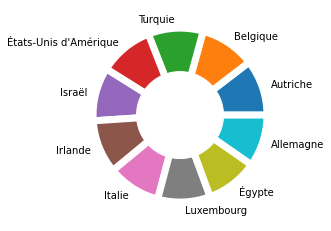

In [54]:
my_circle = plt.Circle( (0,0), 0.5, color='white')

# Custom wedges
plt.pie(disp_high['disponibilité'], labels= disp_high.index, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## ***Pays ayant le moins de disponibilité***

In [55]:
#les 10 pays le moins de disponibilité/habitant
disponibilite_faible = dispo_pays.sort_values(by= ['disponibilité'], axis=0, ascending=True, inplace=False)
disp_low = disponibilite_faible.head(10)
disp_low

,disponibilité
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


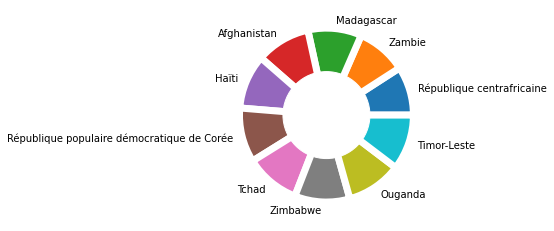

In [56]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.5, color='white')

# Custom wedges
plt.pie(disp_low['disponibilité'], labels= disp_low.index, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## ***Disponibilité alimentaire des produits végétaux***

In [58]:
df_vegetale = pd.DataFrame(df[df.Origine == 'vegetale'])
df_vegetale

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,disponibilité,population,dipo_totale
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,32269589.0,32269589.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,32269589.0,32269589.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,32269589.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,32269589.0,129078356.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,32269589.0,0.0
...,...,...,...,...,...,...,...,...
15406,Îles Salomon,Sésame,vegetale,0.0,0.0,0.0,571336.0,0.0
15407,Îles Salomon,Thé,vegetale,0.0,0.0,0.0,571336.0,0.0
15408,Îles Salomon,Tomates,vegetale,0.0,0.0,0.0,571336.0,0.0
15414,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,571336.0,0.0


In [59]:
dispo_vegetale = (df_vegetale['disponibilité'].sum())
print('la disponibilité alimentaire des produits végétaux est de :', dispo_vegetale) 

la disponibilité alimentaire des produits végétaux est de : 393921.0


In [63]:
disp_vege= round((df_vegetale['disponibilité'].sum()/df['disponibilité'].sum())*100, 2)
disp_vege

80.6

### La disponibilité alimentaire des produits végétaux est de : 393921 Kcal/jour soit 80,6% de la disponibilité totale 

## ***Repartition de la disponibilité intérieure***

In [64]:
#fichier de travail
dispo_int = pd.DataFrame(disponibilite, columns=[ 'Zone', 'Produit', 'Origine', 'Disponibilité intérieure', 'Aliments pour animaux', 'Nourriture', 'Pertes'])
dispo_int

,Zone,Produit,Origine,Disponibilité intérieure,Aliments pour animaux,Nourriture,Pertes
0,Afghanistan,Abats Comestible,animale,53.0,NaN,53.0,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,41.0,NaN,39.0,2.0
2,Afghanistan,Aliments pour enfants,vegetale,2.0,NaN,2.0,NaN
3,Afghanistan,Ananas,vegetale,0.0,NaN,0.0,NaN
4,Afghanistan,Bananes,vegetale,82.0,NaN,82.0,NaN
...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,3.0,NaN,3.0,NaN
15601,Îles Salomon,Viande de Volailles,animale,2.0,NaN,2.0,NaN
15602,Îles Salomon,"Viande, Autre",animale,0.0,NaN,0.0,NaN
15603,Îles Salomon,Vin,vegetale,0.0,NaN,0.0,NaN


In [65]:
# Traitement des valeurs manquantes: on les remplace par zéro
dispo_int.fillna(0, inplace=True)
dispo_int

,Zone,Produit,Origine,Disponibilité intérieure,Aliments pour animaux,Nourriture,Pertes
0,Afghanistan,Abats Comestible,animale,53.0,0.0,53.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,41.0,0.0,39.0,2.0
2,Afghanistan,Aliments pour enfants,vegetale,2.0,0.0,2.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,82.0,0.0,82.0,0.0
...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,3.0,0.0,3.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,2.0,0.0,2.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.0


### ***Part de la disponibilité intérieure qui est attribuée à l’alimentation animale***

In [66]:
part_animaux =(dispo_int['Aliments pour animaux'].sum()/dispo_int['Disponibilité intérieure'].sum())*100

print('la disponibilité intérieure attribuée à l’alimentation animale est de', round(part_animaux,2), '%')

la disponibilité intérieure attribuée à l’alimentation animale est de 13.24 %


### ***Part de la disponibilité intérieure qui est attribuée à l’alimentation humaine***

In [67]:
part_nourrit =(dispo_int['Nourriture'].sum()/dispo_int['Disponibilité intérieure'].sum())*100
print('la disponibilité intérieure attribuée à l’alimentation animale est de', round(part_nourrit,2), '%')


la disponibilité intérieure attribuée à l’alimentation animale est de 49.51 %


### ***Part de la disponibilité intérieure qui est perdue***

In [68]:
perte = (dispo_int['Pertes'].sum()/dispo_int['Disponibilité intérieure'].sum())*100
perte
#print('la disponibilité intérieure perdue est de', round(perte,2), '%')



4.606541541196999

In [64]:
A=(part_animaux, part_nourrit, perte)
A

(13.242418464261426, 49.51021393657058, 4.606541541196999)

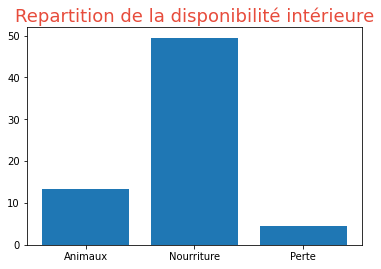

In [69]:
names = ['Animaux', 'Nourriture', 'Perte']
values = [13.24, 49.51, 4.61]
plt.bar(names, values)
plt.title("Repartition de la disponibilité intérieure", fontsize=18, color='#e74c3c')
plt.show()

## ***Je vous remercie****